In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns

In [11]:

head = ["Wikipedia_ID", "Freebase_ID", "Movie_name" , "Release_date", "box_office_revenue", "runtime", "languages","countries", "genres"]

dfmovie =pd.read_csv('data/movie.metadata.tsv',sep='\t',header =None, names =head)
dfsummaries=pd.read_table('data/plot_summaries.txt',header=None,names=["Wikipedia_ID","Summary"])
dfmovie.head()

,Wikipedia_ID,Freebase_ID,Movie_name,Release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:

head = ["Wikipedia_ID","Freebase_ID", "Release_date", "Character_name", "Actor_date_of_birth", "Gender", "Height", "Ethnicity", "Actor_name", "Age","Freebase_character/actor_map_ID", "Freebase_character_ID", "Freebase_actor_ID"]

character =pd.read_csv('data/character.metadata.tsv',sep='\t',header =None, names =head)

character

,Wikipedia_ID,Freebase_ID,Release_date,Character_name,Actor_date_of_birth,Gender,Height,Ethnicity,Actor_name,Age,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [4]:
character[character["Age"] <0]

,Wikipedia_ID,Freebase_ID,Release_date,Character_name,Actor_date_of_birth,Gender,Height,Ethnicity,Actor_name,Age,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
767,15007384,/m/03h4h5p,1934-05-02,NaN,1963-11-07,NaN,NaN,NaN,Franck Dubosc,-29.0,/m/0bwb9k3,NaN,/m/01wlly9
2286,2553539,/m/07mlsy,1918-04-14,NaN,1931-03-25,M,NaN,NaN,Tom Wilson,-12.0,/m/0jsqm1,NaN,/m/0382zh
3892,5917218,/m/0fdf3y,1965,NaN,1983-03-03,F,1.75,NaN,Kim Smith,-18.0,/m/04mb5kf,NaN,/m/03pjkv
6666,73930,/m/0jsjm,1924,Robert,1972-11-07,M,1.80,NaN,Jason London,-48.0,/m/01xrptw,/m/02nwfsk,/m/04kdmg
7188,21242801,/m/05bzjwj,1955-08-07,NaN,1973-08-01,M,1.79,/m/03ttfc,Eduardo Noriega,-17.0,/m/0cg2f0f,NaN,/m/0bkkw0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446570,3642891,/m/09rsyj,1999-10-03,Tess,2936-12-24,F,NaN,NaN,J.J. McColl,-937.0,/m/0l2rdfz,/m/0l2rdg1,/m/0l2rdg8
446581,25868401,/m/09v6ykm,1955,NaN,1967-05-31,F,1.67,/m/03ts0c,Sandrine Bonnaire,-12.0,/m/04j05tr,NaN,/m/07wn_5
446583,8595532,/m/02799cv,1944-02-23,NaN,1947-05-28,M,NaN,NaN,Kevin O'Shea,-3.0,/m/02vcqnq,NaN,/m/02q384f
446816,1276915,/m/04pg6m,1941-06-20,NaN,1957-04-19,M,NaN,NaN,Tony Martin,-15.0,/m/0cg164j,NaN,/m/07q_fg


We observe negative values for the age of the actor which doesn't make sense. Ideally to remove those errors we could scrap the imbd and get the real date of birth of the actors and actress. However as it is not the main topic of our research we transform those outliers as Nan

In [5]:
#Remove negative ages
character = character.mask(character["Age"] <0)

In [6]:
character.describe()

,Wikipedia_ID,Height,Age
count,4.502880e+05,154704.000000,292175.000000
mean,1.397106e+07,1.788924,37.890901
std,1.079665e+07,4.381637,14.085909
min,3.300000e+02,0.610000,0.000000
25%,3.760184e+06,1.676400,28.000000
50%,1.189361e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


Let's groupby gender and observe the main differences between males and females in our dataset.

In [7]:
Grouped_gender = character.groupby("Gender")
Grouped_gender.Age.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,99124.0,32.956055,13.376106,0.0,24.0,30.0,40.0,99.0
M,191277.0,40.469717,13.749781,0.0,31.0,39.0,49.0,103.0


F         Axes(0.1,0.15;0.363636x0.75)
M    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

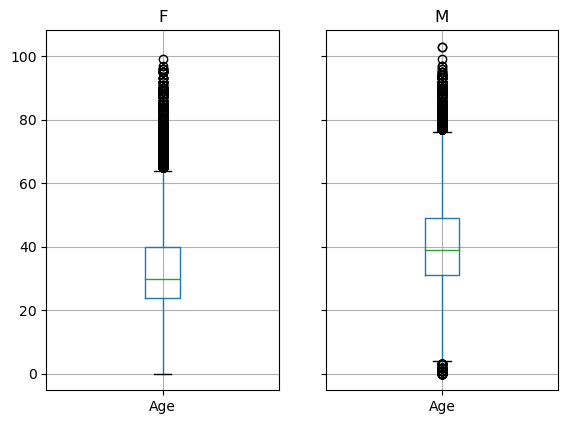

In [8]:
Grouped_gender.boxplot(column = ["Age"])

We observe a difference between male and female age let's see if it's statistically significant.


In [33]:
ttest_ind( character.loc[character['Gender'] == "M", 'Age'].dropna(),character.loc[character['Gender'] == "F", 'Age'].dropna())

TtestResult(statistic=140.92509242040052, pvalue=0.0, df=290399.0)

The p-value is lower than 0.05 thus we can reject the null hypothesis that the two distributions have the same mean. The statistics is positive thus we can say than in average man actors are older than women.

In [6]:
dfmovie.describe()

,Wikipedia_ID,box_office_revenue,runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [5]:
len(dfmovie[dfmovie["runtime"]<15])

1971

In [9]:
len(dfmovie)

81741

In [12]:
movie_merged = dfmovie.merge(dfsummaries,how ='left')
movie_merged["summary_presence"] = (~movie_merged["Summary"].isna()).astype(int)

In [54]:
grouped = movie_merged.groupby("summary_presence")

In [55]:
grouped.runtime.describe()

,count,mean,std,min,25%,50%,75%,max
summary_presence,,,,,,,,
0,25711.0,88.679838,129.339850,0.0,71.0,90.0,101.0,14400.0
1,35580.0,128.540254,5721.459707,0.3,86.0,96.0,110.0,1079281.0


0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

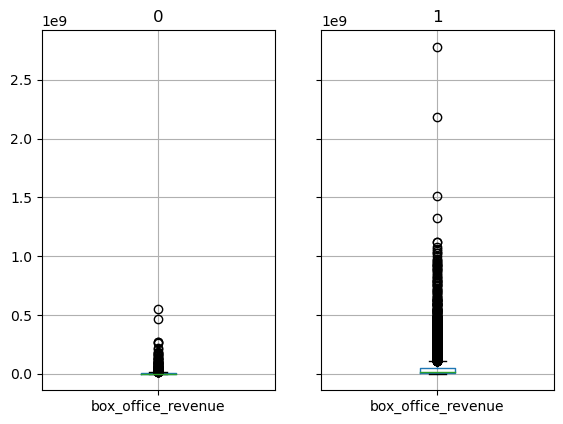

In [56]:
grouped.boxplot(column= ["box_office_revenue"])

summary_presence
0    [[Axes(0.125,0.11;0.775x0.77)]]
1    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

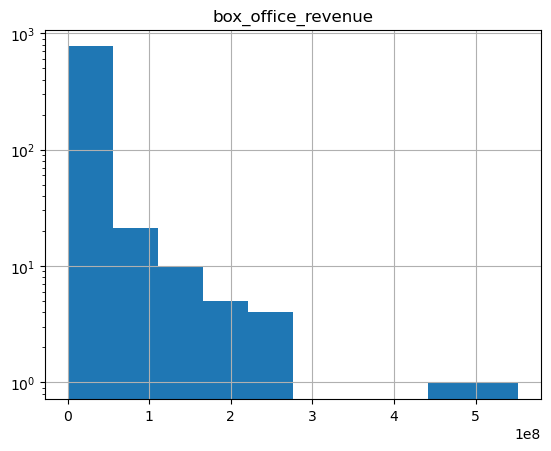

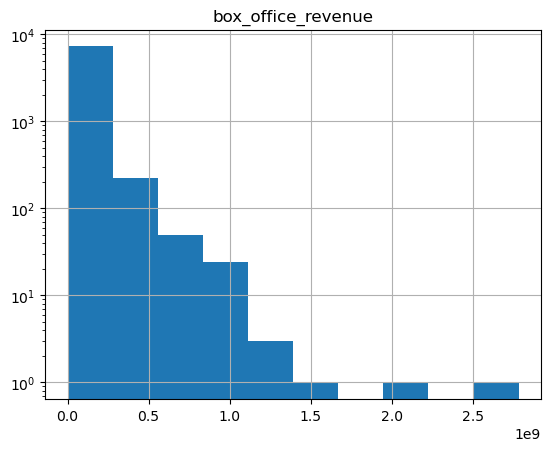

In [57]:
grouped.hist(column= ["box_office_revenue"],log=True)

In [60]:
ttest_ind(movie_merged.loc[movie_merged['summary_presence'] == 1, 'box_office_revenue'].dropna(),movie_merged.loc[movie_merged['summary_presence'] == 0, 'box_office_revenue'].dropna())

TtestResult(statistic=9.443907873081669, pvalue=4.5670654197868206e-21, df=8399.0)

The p-value is inferior to 0.05 thus we can reject the null hypothesis that the box-office revenue follow the same distribution when there is a summary.

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

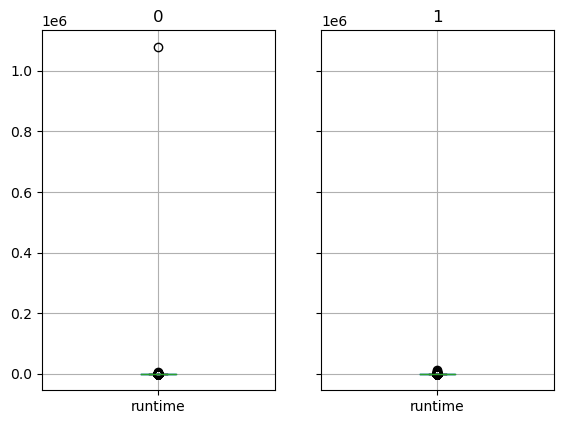

In [45]:
grouped.boxplot(column= ["runtime"])

In [59]:
ttest_ind(movie_merged.loc[movie_merged['summary_presence'] == 1, 'runtime'].dropna(),movie_merged.loc[movie_merged['summary_presence'] == 0, 'runtime'].dropna())

TtestResult(statistic=1.1168974844246675, pvalue=0.26404253877440464, df=61289.0)

The runtime however is not statistically different between the two populations

In [48]:
movie_merged

,Wikipedia_ID,Freebase_ID,Movie_name,Release_date,box_office_revenue,runtime,languages,countries,genres,Summary,summary_presence
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",1
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,1
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",1
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,1
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,1
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN,0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",1


In [71]:
for i in movie_merged.loc[(movie_merged["runtime"]<0.5) & (movie_merged["summary_presence"]==1),["Summary"]].values:
    print(i)

['A stationary camera looks diagonally across a racetrack toward the infield showing the horses as they pass. Once the horses have passed the camera it is clear that the race has come to an end and there is a close finish between three horses. Once the race is over police officers run onto the field. The camera also displays various members of the audience moving around.']
['The film opens with a shot of the North Sea Canal with a winged statue on the far side. Three men row towards the shore in a small rowing boat while a small boy waits on the quayside and then turns to face the camera. {{Cite web}}']
